In [21]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

In [22]:
def func1(x):
    return x**4 - 1.5 * x ** 3 - x * x + 1.5 * x

In [23]:
def gradient_func1(x):
    return 4 * x ** 3 - 4.5 * x ** 2 - 2 * x + 1.5

In [24]:
def func2(x):
    return x ** 2 - 4 * x + 4

In [25]:
def gradient_func2(x):
    return 2 * x - 4

In [41]:
def gradient_descent(function, start, gradient: Callable[[float], float], learning_rate, max_iter, tol):
    iterations = 0
    x = start
    steps = [(start, gradient(start))]

    for _ in range(max_iter):
        iterations += 1
        diff = learning_rate * gradient(x)
        if np.abs(diff) < tol:
            break

        x = x - diff
        steps.append((x, gradient(x)))

    return steps, function(x), iterations

In [98]:
def main(function, gradient, learning_rate):

    x = np.linspace(-5, 5, 2000)
    y = function(x)

    fig, ax = plt.subplots(dpi=400)
    ax.plot(x, y, label='f(x)')

    steps, result, iterations = gradient_descent(function, 0.6, gradient, learning_rate, 1000, 0.000001)
    result = steps[-1][0]

    steps_x = [point[0] for point in steps]
    steps_y = [function(point[0]) for point in steps]

    ax.plot(steps_x, steps_y, 'ro-', label='Gradient Descent', markersize=6)
    ax.plot(steps_x, steps_y, label='Search Trajectory')
    ax.plot(result, function(result), 'go', label='Min. value found', markersize=6)

    ax.legend(loc='lower right', fontsize='small')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent Algorithm\nx² - 4x + 4')

    text = (f"Learning rate: {learning_rate}\n"
            f"Min. local value: {function(result):.3f}\n"
            f"No. of iterations: {iterations}")

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.text(0.025, 0.025, text, transform=ax.transAxes, fontsize=10.5,
            verticalalignment='bottom', horizontalalignment='left', bbox=props)

    plt.ylim(-0.005, 0.14)
    plt.xlim(1.6, 2.4)

    plt.show()

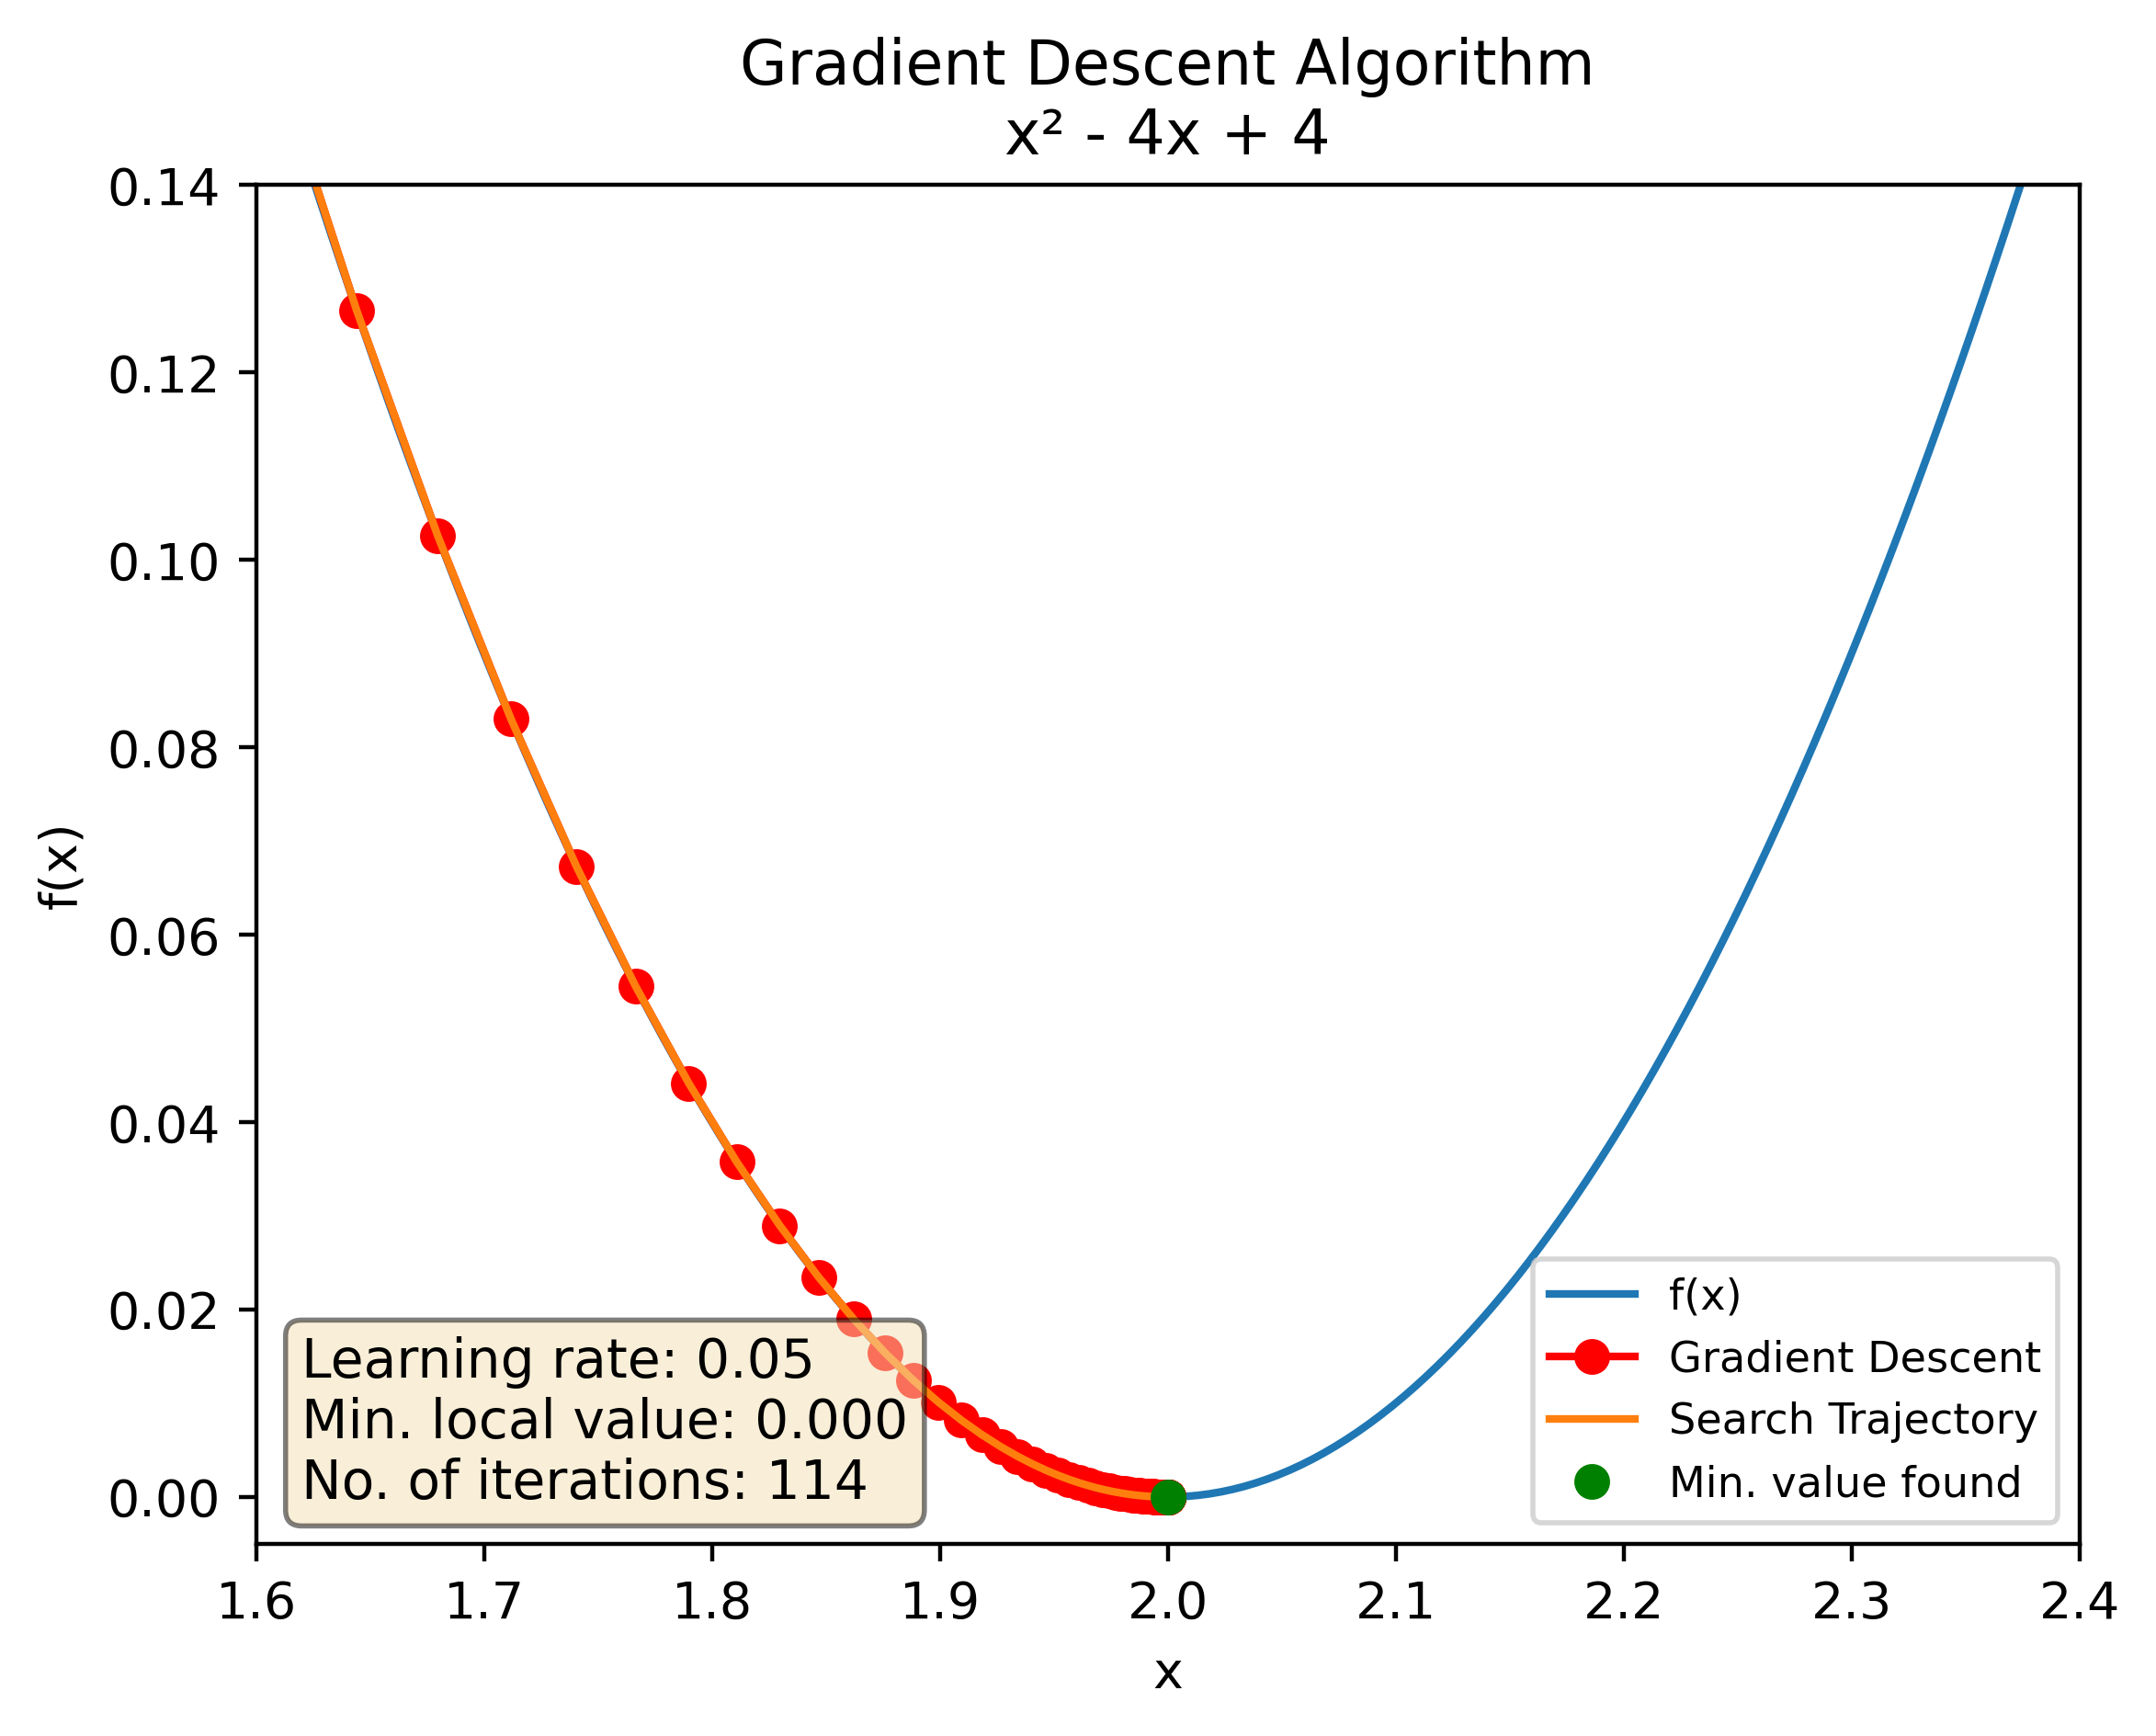

In [99]:
main(func2, gradient_func2, 0.05)

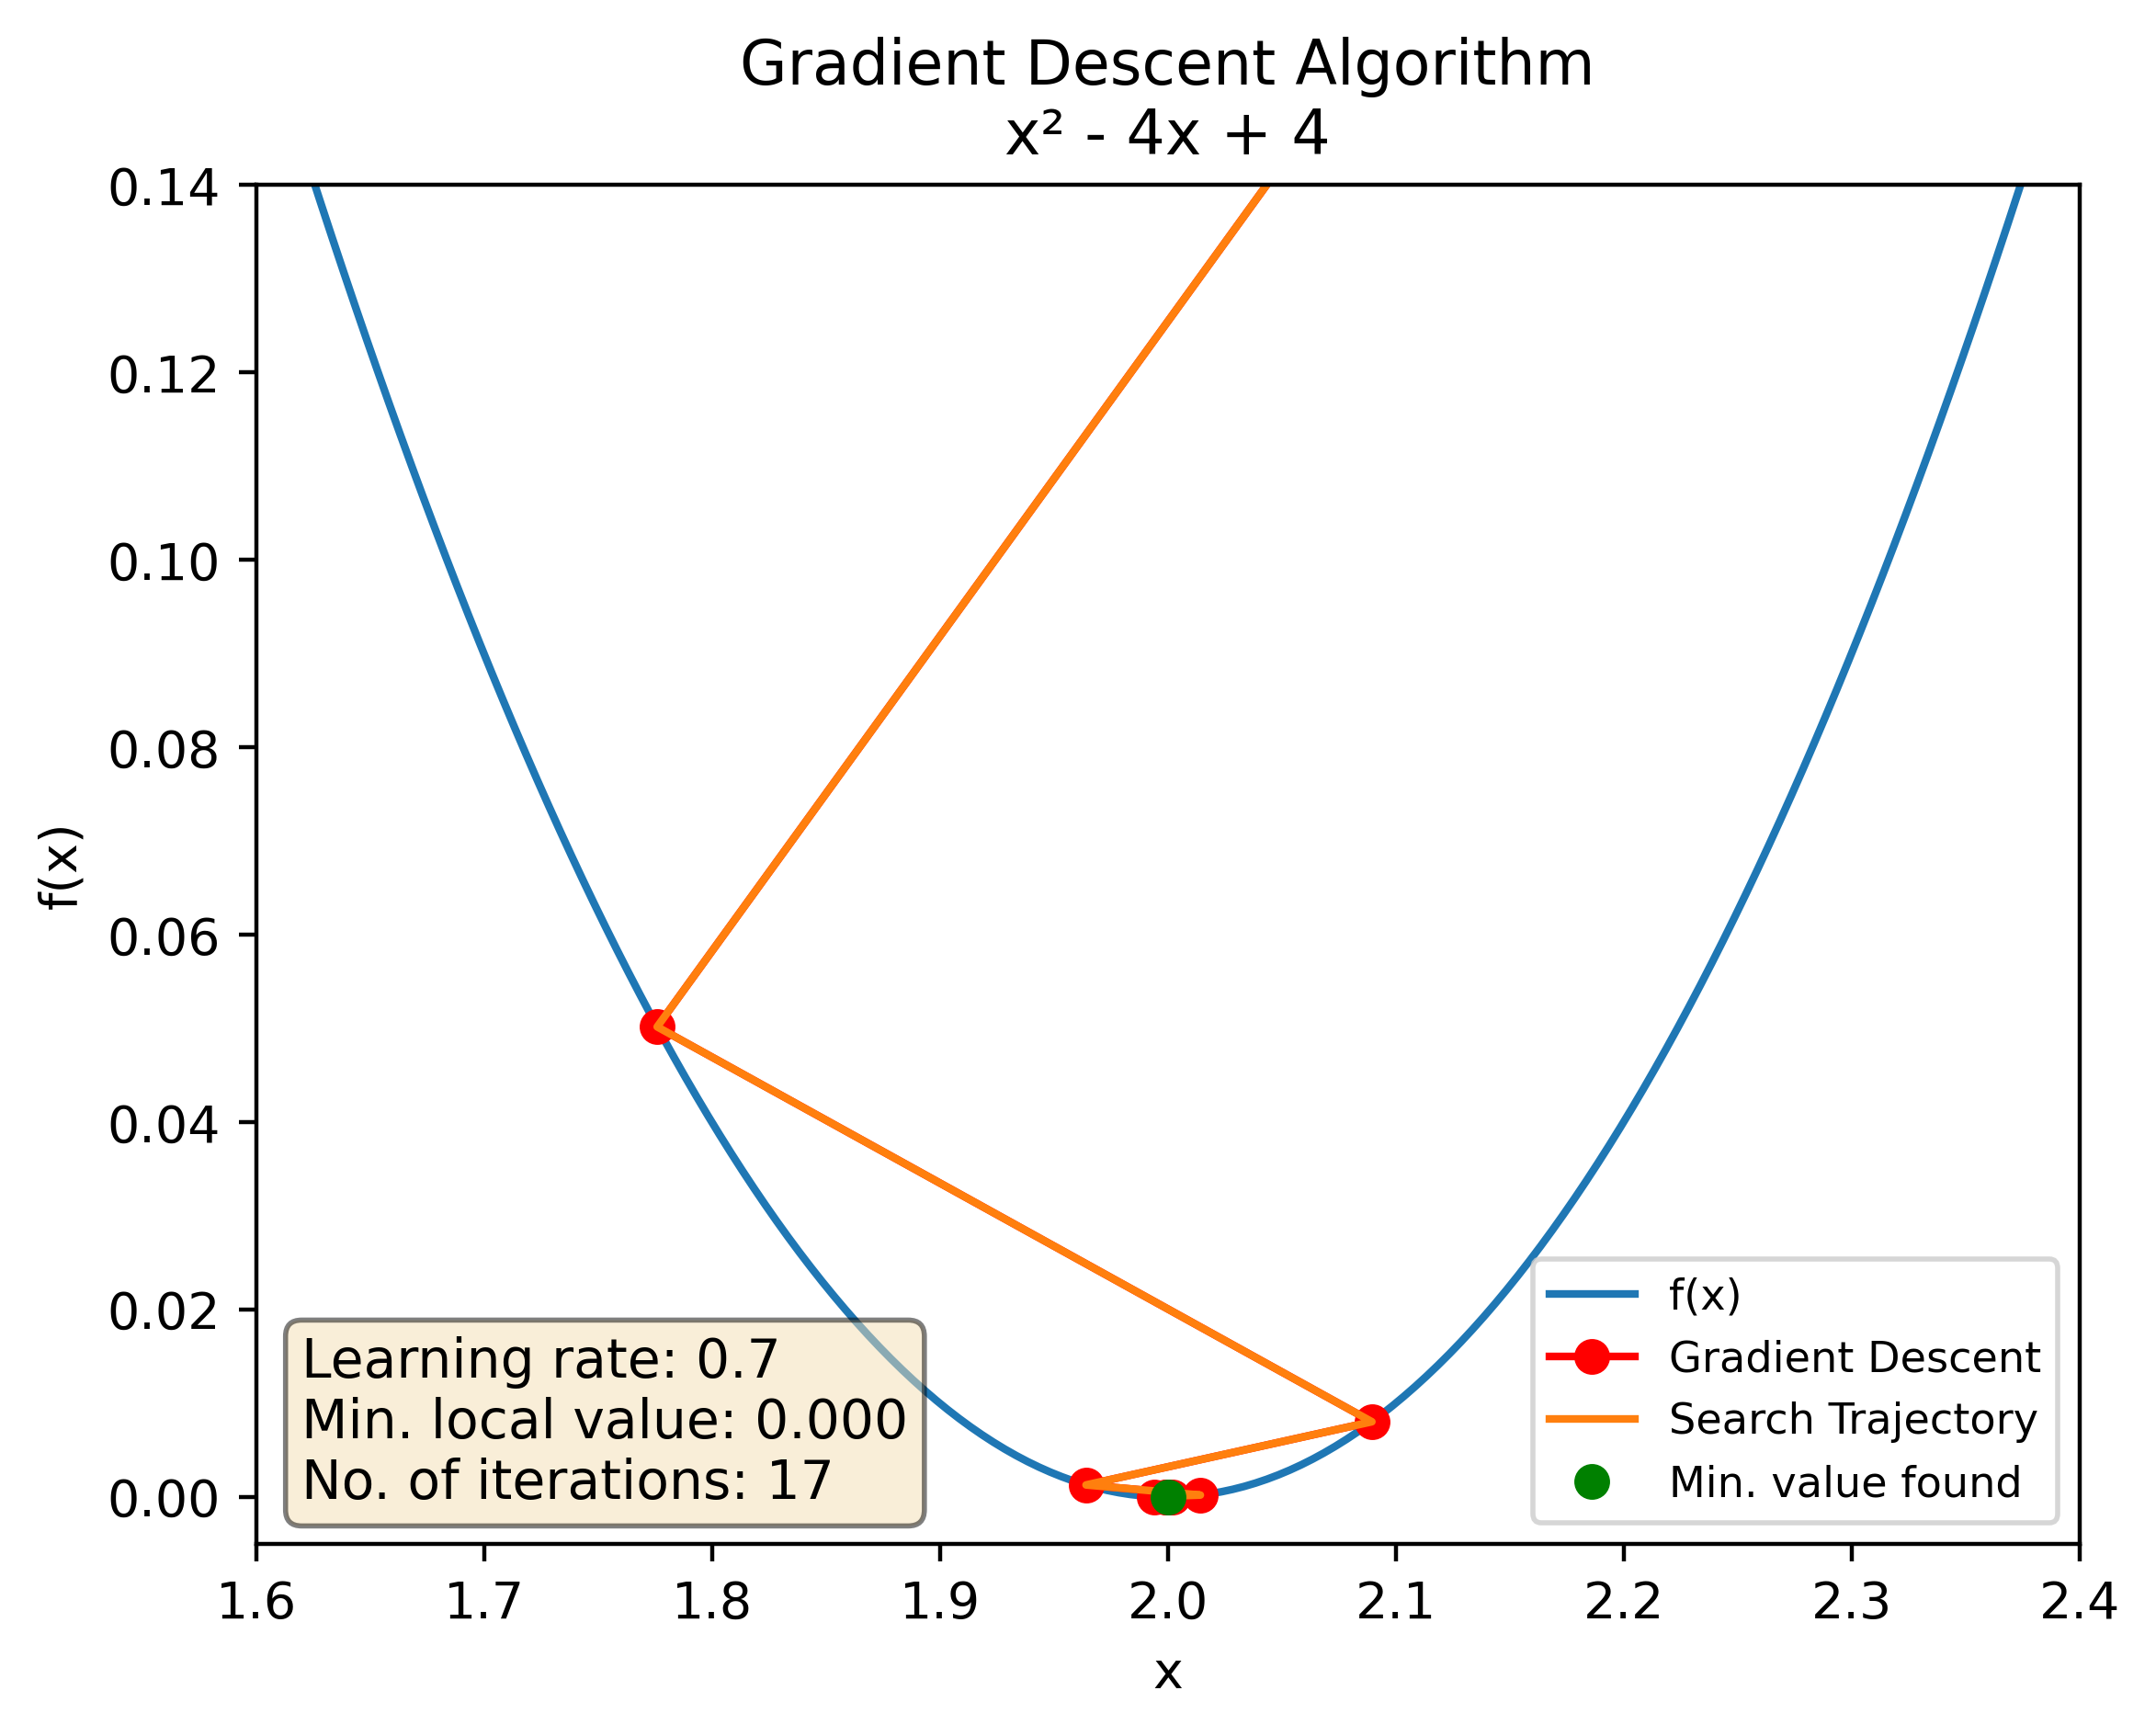

In [100]:
main(func2, gradient_func2, 0.7)

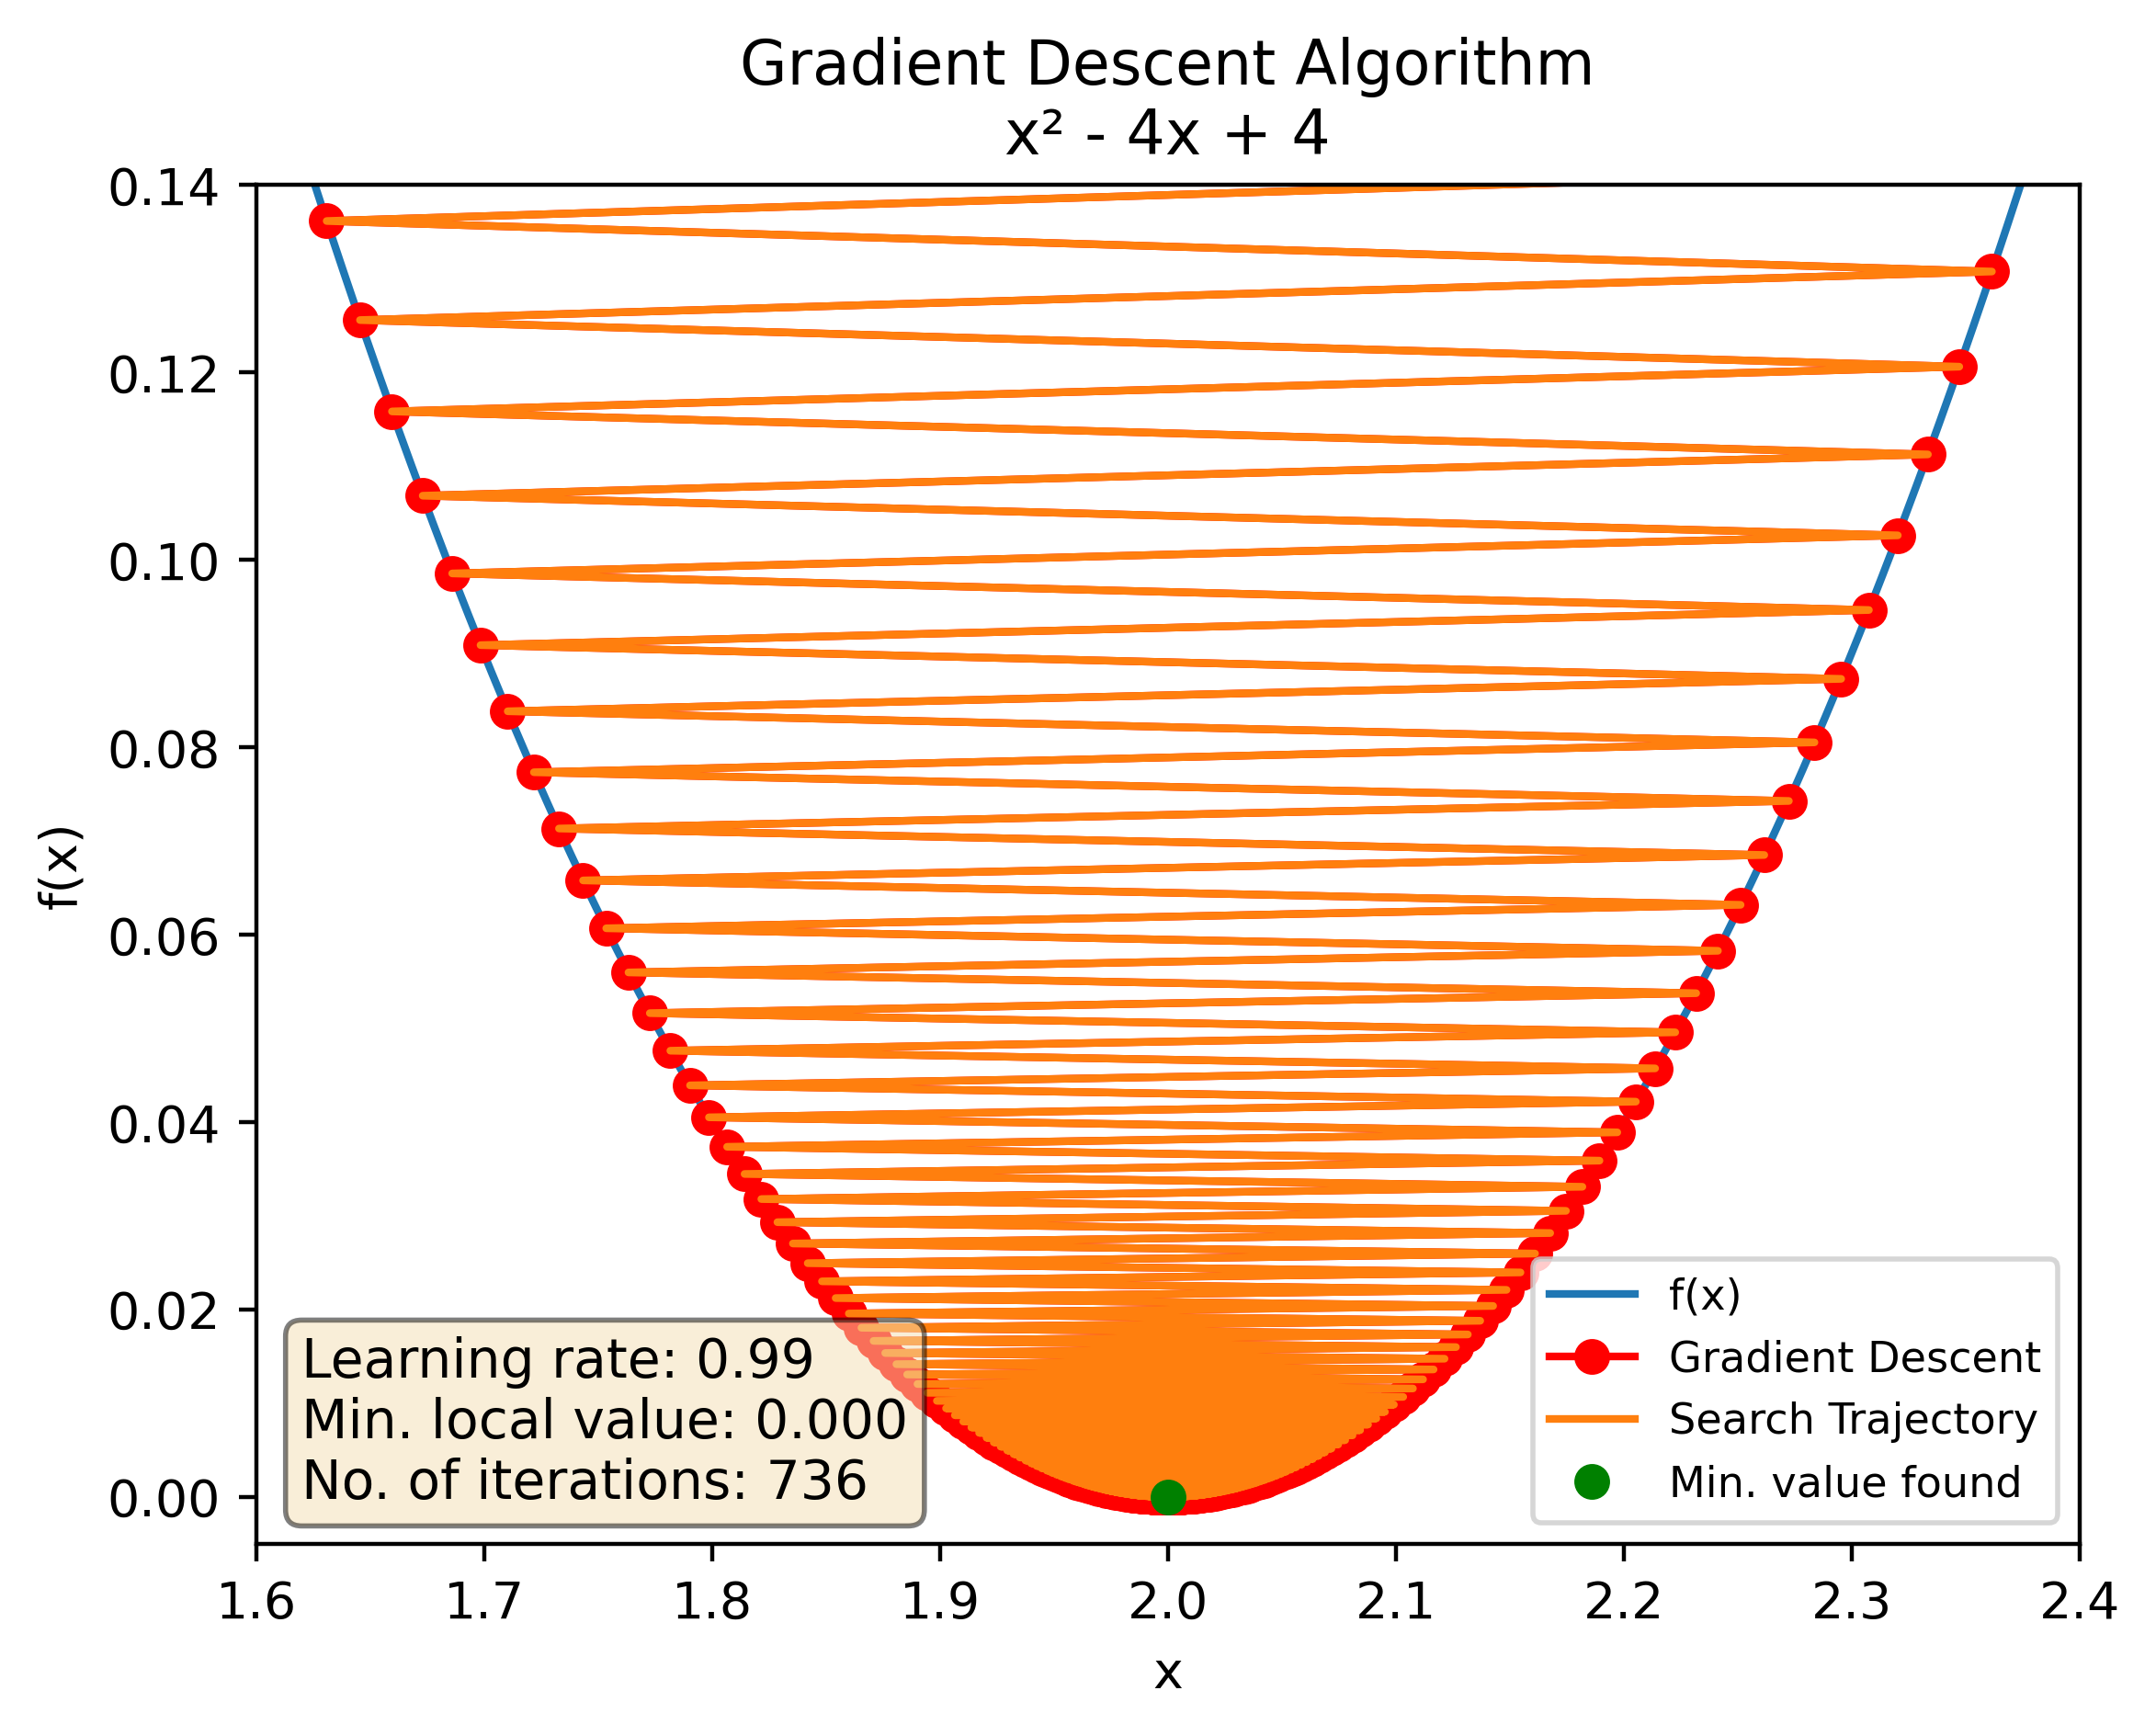

In [101]:
main(func2, gradient_func2, 0.99)

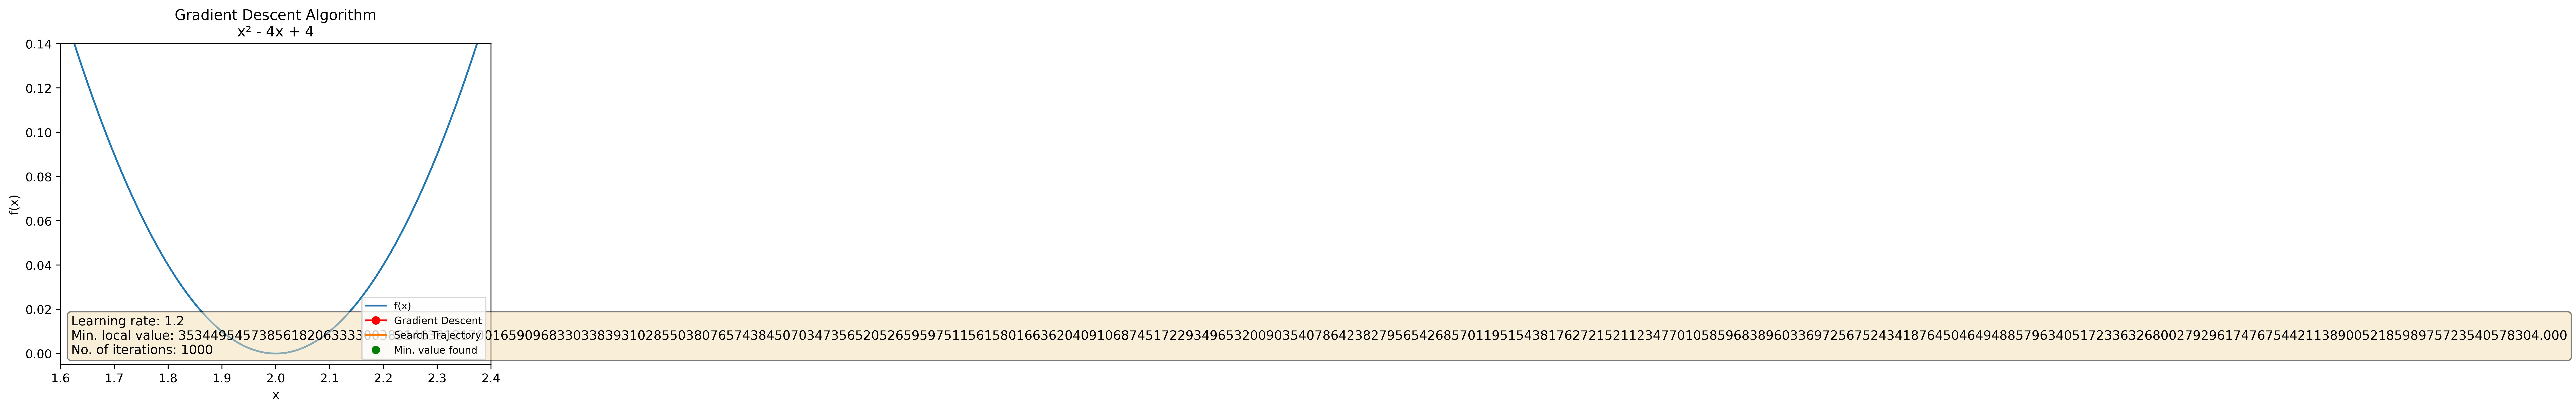

In [103]:
main(func2, gradient_func2, 1.2)

In [105]:
def main_saddle_point(gradient, function):

    x = np.linspace(-3, 3, 200)
    y = function(x)

    fig, ax = plt.subplots(dpi=400)
    ax.plot(x, y, label='f(x)')

    steps, result, iterations = gradient_descent(function, 0.6, gradient, 0.1, 1000, 0.000001)
    result = steps[-1][0]

    steps_x = [point[0] for point in steps]
    steps_y = [function(point[0]) for point in steps]

    ax.plot(steps_x, steps_y, 'ro-', label='Gradient Descent', markersize=6)
    ax.plot(steps_x, steps_y, label='Search Trajectory')
    ax.plot(result, function(result), 'go', label='Min. value found', markersize=6)

    ax.legend(loc='lower right', fontsize='small')
    learning_rate = 0.1

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent Algorithm\nx⁴ - 1.5x³ - x² + 1.5x')

    text = (f"Learning rate: {learning_rate:.1f}\n"
            f"Min. local value: {function(result):.3f}\n"
            f"No. of iterations: {iterations}")

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.text(0.025, 0.025, text, transform=ax.transAxes, fontsize=10.5,
            verticalalignment='bottom', horizontalalignment='left', bbox=props)

    plt.ylim(-1.5, 1)
    plt.xlim(-1.5, 2)

    plt.show()

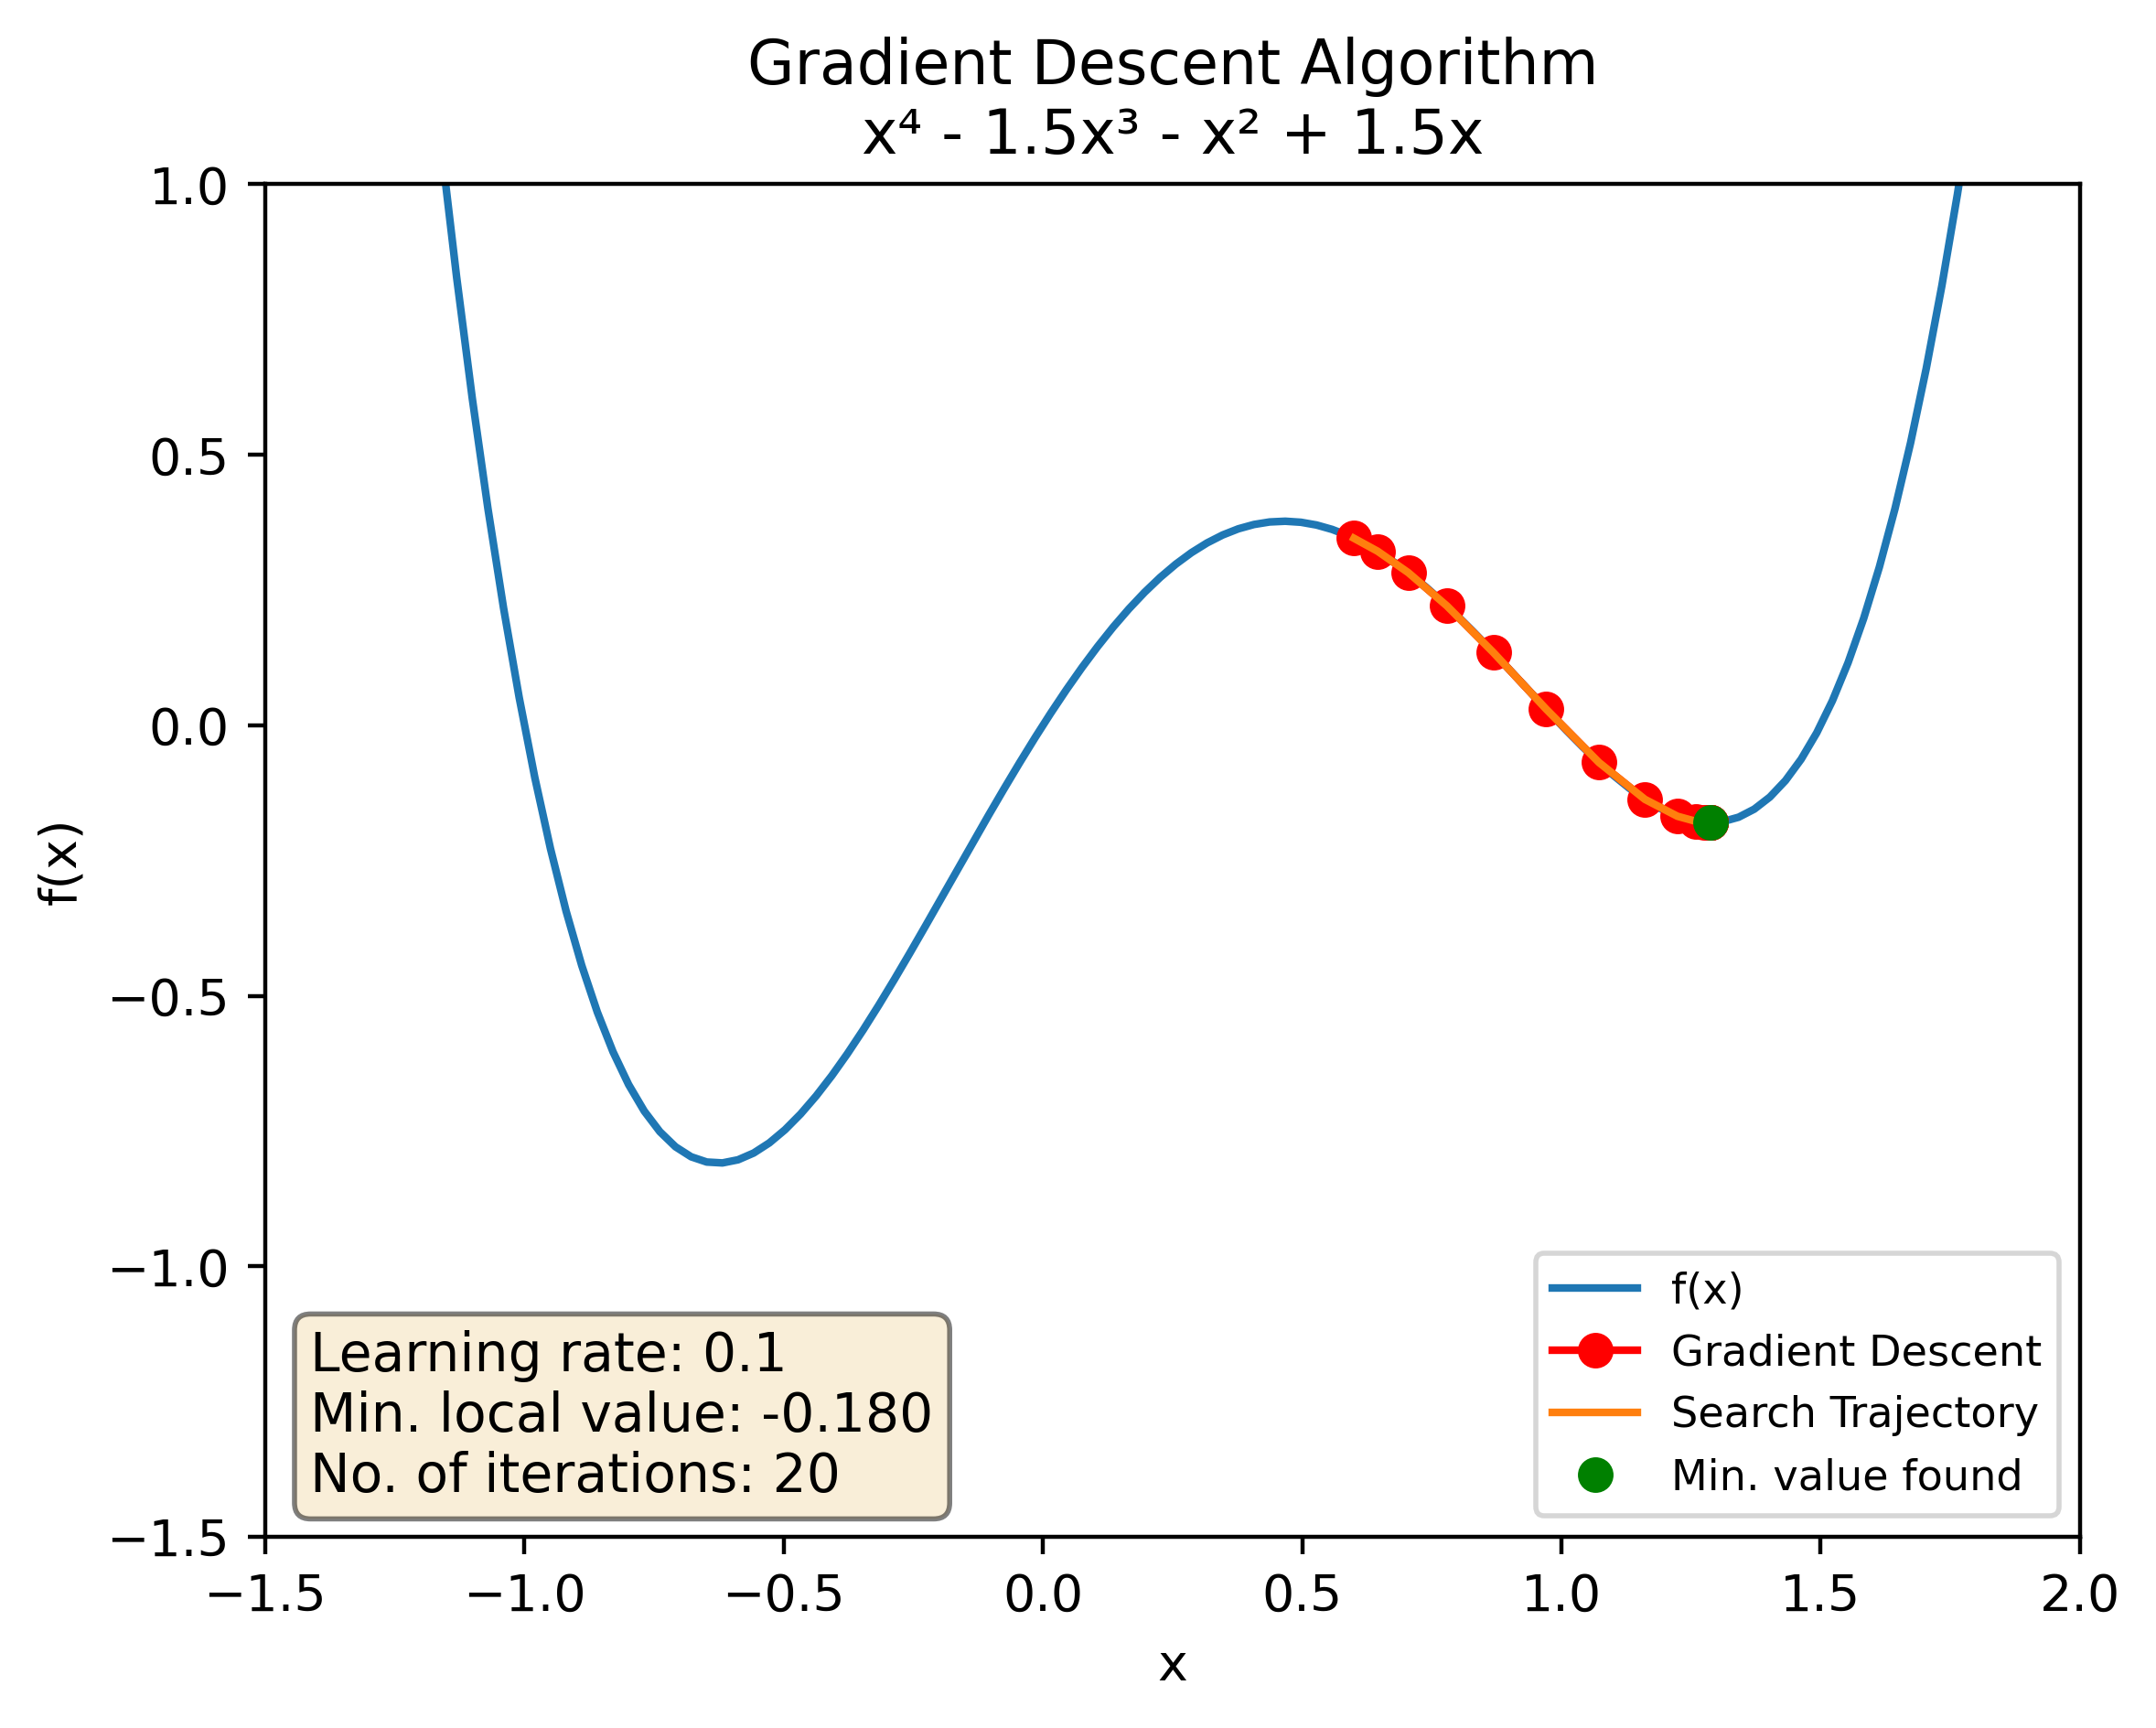

In [107]:
main_saddle_point(gradient_func1, func1)

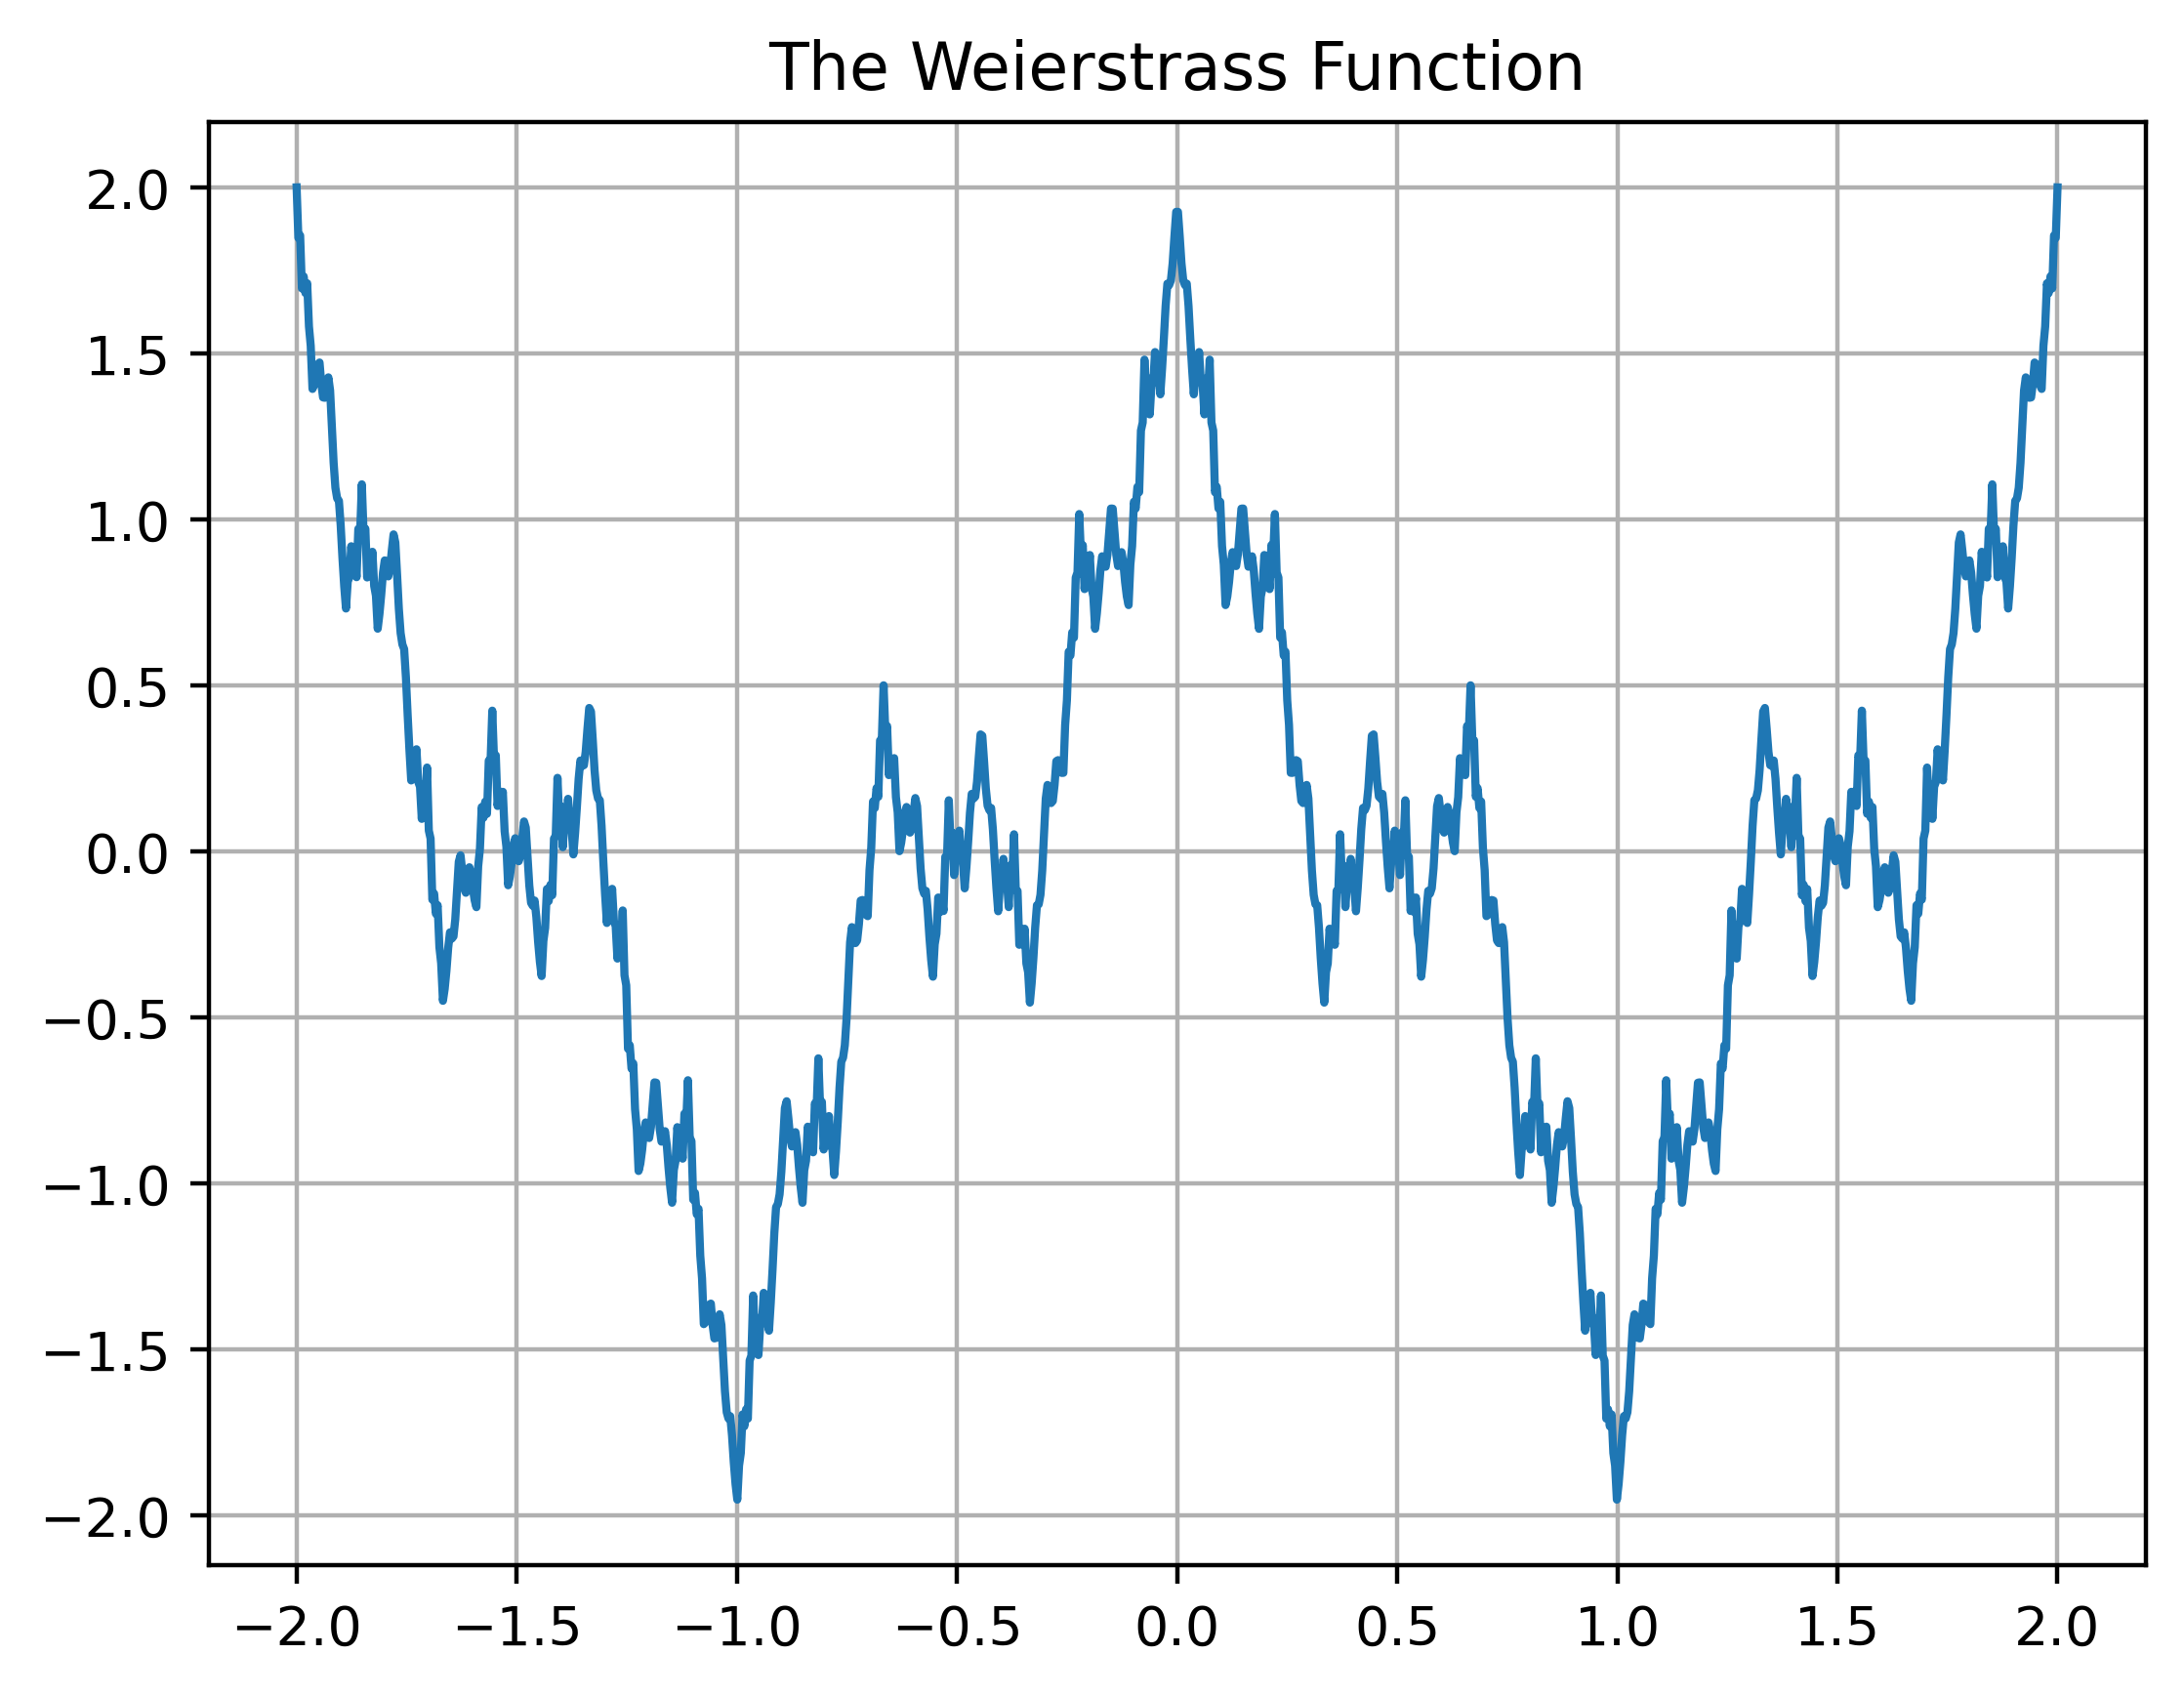

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def weierstrass_function(x, n_terms=100):
    w = np.zeros_like(x)
    for n in range(n_terms):
        w += (0.5) ** n * np.cos(3**n * np.pi * x)
    return w

x = np.linspace(-2, 2, 1000)
y = weierstrass_function(x, n_terms=100)

plt.figure(dpi=400)
plt.plot(x, y)
plt.title("The Weierstrass Function")
plt.grid(True)
plt.show()